In [ ]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

#IMDB 데이터다운로드
data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True)

# 각 파일에 리뷰 텍스트를 불러오는 함수 
# 데이터를 가져올 디렉토리를 가져옴 , 디렉토리에 있는 파일들을 하나씩 리뷰에 넣음 
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory): # os.listdir = 해당 디렉토리의 파일명을 가져옴 그래서 밑에 합침 
    with open(os.path.join(directory,file_path),"r", encoding = 'utf-8') as file: # os.path.join('C:','a','b') >> \c:\a\b 경로 병합 
      data["review"].append(file.read()) # data['review']에 파일 하나씩을 append한다 
  return pd.DataFrame.from_dict(data)
  #directory\pos and directory\neg 에 있는 파일들을 읽어서 data['review']에 넣는다   

def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos")) #directory\pos\ 안에 있는 파일을 data['review']안에 넣습니다 
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1    # 긍정은 1값 표시 
  neg_df["sentiment"] = 0    # 부정은 0값 표시 
  return pd.concat([pos_df, neg_df])  # pd.concat << pandas 파일 두개를 합치는 함수

train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train")) #파일 받은 경로안에 파일들을 pos와 neg로 sentimental 을 적어준다 
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))


In [ ]:

print(train_df.head()) # head = 상위 5개 

reviews = list(train_df['review']) #리뷰에 있는 텍스트들을 리스트화한다 .



tokenized_reviews = [r.split() for r in reviews] # 리스트화한 리뷰 텍스트들을 하나씩 스플릿해서 넣는다 .

review_len_by_token = [len(t) for t in tokenized_reviews] #스플릿한 단어들의 갯수를 가져온다 
print(review_len_by_token)
review_len_by_alphabet = [len(s.replace(' ','')) for s in reviews] # 리뷰 텍스트들의 알파벳길이 
print(review_len_by_alphabet)


                                              review  sentiment
0  This film enhanced my opinion of Errol Flynn. ...          1
1  I would just like all of the fans of this docu...          1
2  Still love it 17 or so years after the first t...          1
3  Pinjar is one of the few movies that really le...          1
4  "Elvira, Mistress Of The Dark" is a sort of "H...          1
[151, 186, 119, 139, 352, 242, 168, 322, 114, 308, 102, 117, 156, 243, 251, 125, 603, 138, 133, 197, 123, 108, 491, 237, 116, 144, 184, 271, 118, 130, 217, 889, 216, 136, 390, 591, 89, 143, 51, 260, 265, 129, 388, 137, 511, 117, 116, 30, 303, 187, 91, 139, 144, 578, 162, 250, 178, 112, 799, 354, 253, 42, 141, 137, 546, 72, 448, 969, 57, 474, 370, 105, 127, 129, 457, 437, 180, 124, 518, 144, 117, 112, 743, 369, 145, 180, 227, 222, 76, 132, 190, 125, 173, 217, 187, 556, 133, 448, 397, 263, 153, 129, 63, 474, 123, 125, 136, 173, 393, 114, 97, 453, 96, 357, 657, 136, 127, 222, 164, 141, 636, 259, 548, 270, 64, 16

Text(0, 0.5, 'Number of Reviews')

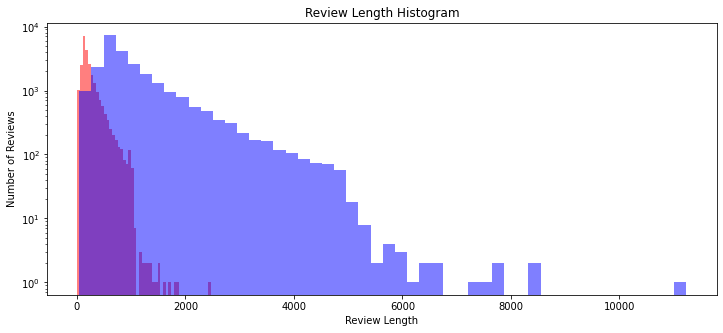

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.hist(review_len_by_token, bins=50, alpha=0.5, color = 'r', label = 'word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color= 'b', label = 'alphabet')
plt.yscale('log', nonposy='clip') #bin = 막대기 갯수 

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')


In [ ]:

import numpy as np
print('문장 최대 단어 갯수: ', np.max(review_len_by_token)) # 단어갯수 
print('문장 최소 단어 갯수: ', np.min(review_len_by_token)) 
print('문장 평균길이: ', np.mean(review_len_by_token))
print('문장 길이 표준편차: ', np.std(review_len_by_token))
print('문장 중간단어 갯수: ', np.median(review_len_by_token))

print('제 1 사분위 길이: ', np.percentile(review_len_by_token, 25))
print('제 3 사분위 길이: ', np.percentile(review_len_by_token, 75))


문장 최대 단어 갯수:  2470
문장 최소 단어 갯수:  10
문장 평균길이:  233.7872
문장 길이 표준편차:  173.72955740506563
문장 중간단어 갯수:  174.0
제 1 사분위 길이:  127.0
제 3 사분위 길이:  284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f8b4ecdfd30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8b4ec6b780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b4ec76588>],
 'means': [<matplotlib.lines.Line2D at 0x7f8b4ec76240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b4ec6be80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8b4ec6b080>,
  <matplotlib.lines.Line2D at 0x7f8b4ec6b400>]}

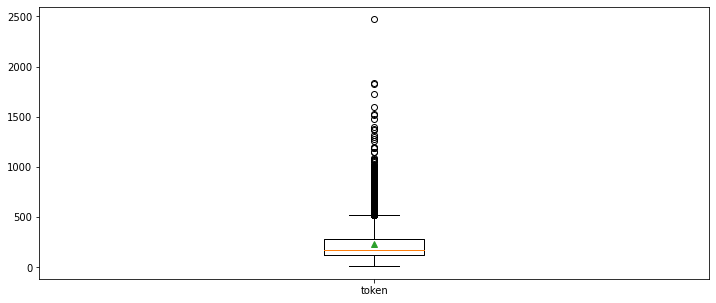

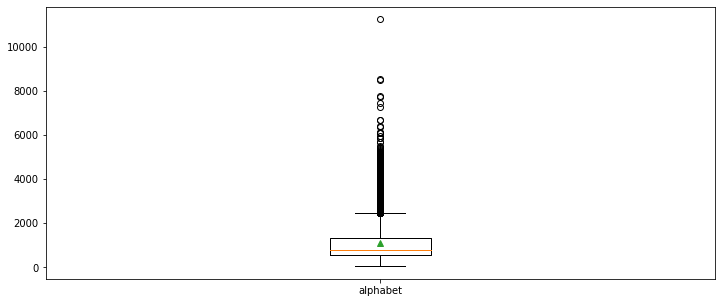

In [ ]:

plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_alphabet],
            labels = ['alphabet'],
            showmeans=True)


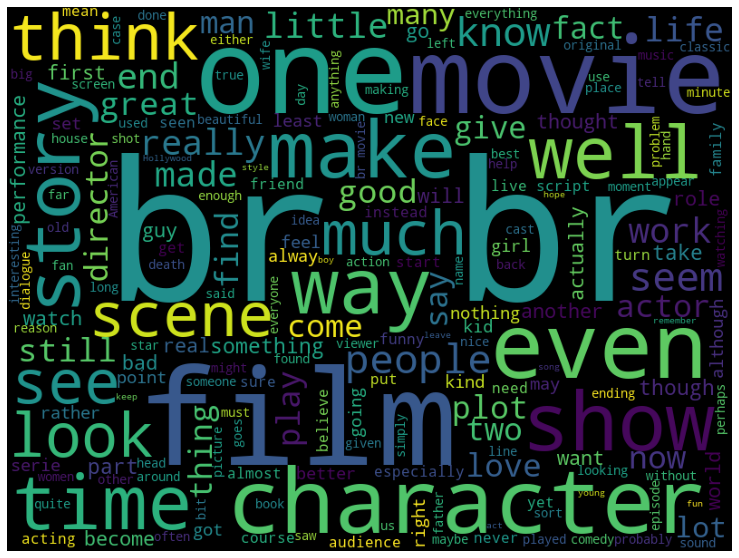

In [ ]:

from wordcloud import WordCloud, STOPWORDS #
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()